In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df1 = pd.read_csv('lichess_games_1_cleaned.csv')

In [3]:
df1.drop(columns = 'Unnamed: 0', inplace = True)
df1

,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_move_count
0,13,outoftime,white,Rapid,1500,1191,D10,Slav Defense: Exchange Variation,5
1,16,resign,black,Blitz,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,61,mate,white,Blitz,1496,1500,C20,King's Pawn Game: Leonardis Variation,3
3,61,mate,white,Rapid,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,95,mate,white,Classical,1523,1469,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...
20053,24,resign,white,Rapid,1691,1220,A80,Dutch Defense,2
20054,82,mate,black,Rapid,1233,1196,A41,Queen's Pawn,2
20055,35,mate,white,Rapid,1219,1286,D00,Queen's Pawn Game: Mason Attack,3
20056,109,resign,white,Rapid,1360,1227,B07,Pirc Defense,4


In [7]:
turns_mean = df1['turns'].mean()
turns_min = df1['turns'].min()
turns_max = df1['turns'].max()

In [8]:
#actually not interested in any games less than 5 turns, as this would be indicative of an unneccessary resignation
#or an unforgivable early blunder such as a 'Scholar's Mate
temp = df1.loc[df1['turns'] == turns_min]
df1 = df1.loc[df1['turns'] >=5]

In [9]:
df1 #Good still plenty of games to work with

,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_move_count
0,13,outoftime,white,Rapid,1500,1191,D10,Slav Defense: Exchange Variation,5
1,16,resign,black,Blitz,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,61,mate,white,Blitz,1496,1500,C20,King's Pawn Game: Leonardis Variation,3
3,61,mate,white,Rapid,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,95,mate,white,Classical,1523,1469,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...
20053,24,resign,white,Rapid,1691,1220,A80,Dutch Defense,2
20054,82,mate,black,Rapid,1233,1196,A41,Queen's Pawn,2
20055,35,mate,white,Rapid,1219,1286,D00,Queen's Pawn Game: Mason Attack,3
20056,109,resign,white,Rapid,1360,1227,B07,Pirc Defense,4


(array([ 1620.,     0.,     0., 10896.,     0.,     0.,  6310.,     0.,
            0.,   890.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

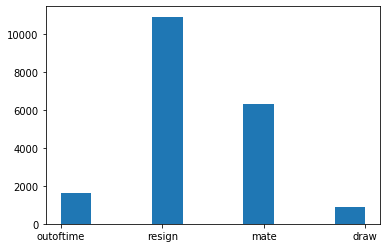

In [10]:
#let's check out the different victory status conditions
vs_oot = df1.loc[df1['victory_status'] == 'outoftime']
vs_resign = df1.loc[df1['victory_status'] == 'resign']
vs_mate = df1.loc[df1['victory_status'] == 'mate']
vs_draw = df1.loc[df1['victory_status'] == 'draw']

plt.hist(df1['victory_status'])

This is unnexpected. I had expected a lot more draws, but perhaps it is because I am looking at all games. Lower level players are known to be less likely to draw and more likely to make mistakes therefore leaving the boardstate uneven. I am curious to know if I increase the ELO rating if we would be likely to see more draws.

In [11]:
#picking an arbitrary number of 1900
df_high_elo_white = df1.loc[df1['white_rating'] >= 1900]
df_high_elo_black = df1.loc[df1['black_rating'] >= 1900]

In [12]:
df2 = pd.concat([df_high_elo_white,df_high_elo_black]).drop_duplicates().reset_index(drop=True)

(array([2643.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,  849.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  224.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  334.]),
 array([0.  , 0.06, 0.12, 0.18, 0.24, 0.3 , 0.36, 0.42, 0.48, 0.54, 0.6 ,
        0.66, 0.72, 0.78, 0.84, 0.9 , 0.96, 1.02, 1.08, 1.14, 1.2 , 1.26,
        1.32, 1.38, 1.44, 1.5 , 1.56, 1.62, 1.68, 1.74, 1.8 , 1.86, 1.92,
        1.98, 2.04, 2.1 , 2.16, 2.22, 2.28, 2.34, 2.4 , 2.46, 2.52, 2.58,
        2.64, 2.7 , 2.76, 2.82, 2.88, 2.94, 3.  ]),
 <a list of 50 Patch objects>)

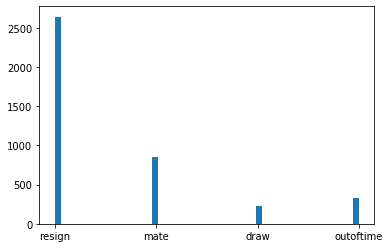

In [13]:
plt.hist(df2['victory_status'], bins = 50)
#hm, it still seems like there are a low amount of draws here. Let's check the amount of time outs in comparison


In [14]:
print(len(vs_oot))
print(len(vs_draw))
#still inconclusive, moving on to the meat of our operation, openings

1620
890


Going to create a second dataframe of just the opening ecos for ease of use, this data frame will be off of a pivot table aggregating on size in order to get the number of games played

In [98]:
#This isn't working out as planned...let me try to create a new dataframe from the opening ecos

df_just_eco = pd.DataFrame(df1, columns= ['opening_eco'])

df_just_eco = df_just_eco.pivot_table(index=['opening_eco'], aggfunc='size')
column_names = ['Eco', 'Games']
df_just_eco = pd.DataFrame(df_just_eco)
df_just_eco.reset_index(inplace = True)
df_just_eco.columns = column_names
print(df_just_eco)

     Eco  Games
0    A00    937
1    A01    154
2    A02     65
3    A03     75
4    A04    276
..   ...    ...
360  E92      5
361  E94      6
362  E95      1
363  E97      3
364  E98      2

[365 rows x 2 columns]


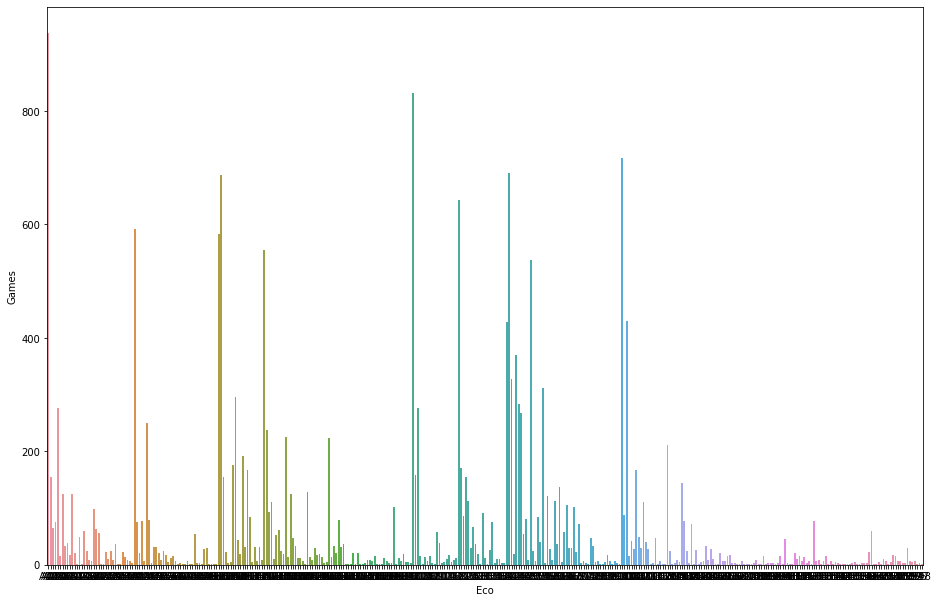

In [108]:
#doing a general sweep of all of the openings, using opening_eco for it's shorter label
a4_dims = (15.7, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(data = df_just_eco, x = 'Eco', y = 'Games', ax = ax,)
plt.show()

let's grab all of the games that have at least 50 plays, for now, and see how it goes

In [109]:
df_just_eco = df_just_eco.loc[df_just_eco['Games'] >=50]

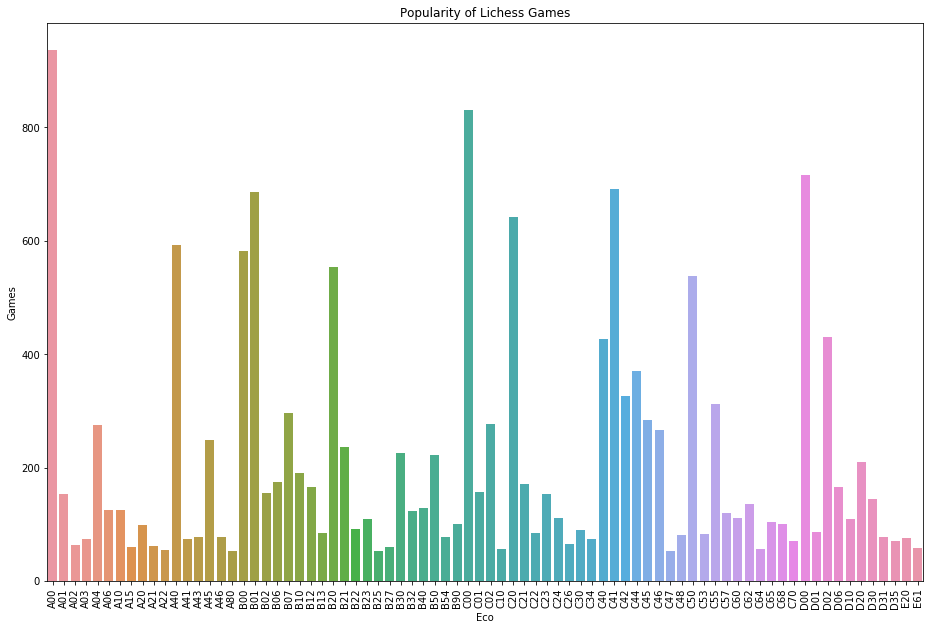

In [120]:
#This is slightly more legible
a4_dims = (15.7, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(data = df_just_eco, x = 'Eco', y = 'Games', ax = ax,).set_xticklabels(rotation=90, labels = df_just_eco['Eco'])
plt.title('Popularity of Lichess Games')
plt.show()

Seems like There are definitely openings that are astoundingly more popular than other openings. Let's create a smaller graph and focus on these for now

In [121]:
df_most_popular = df_just_eco.loc[df_just_eco['Games']>=200]

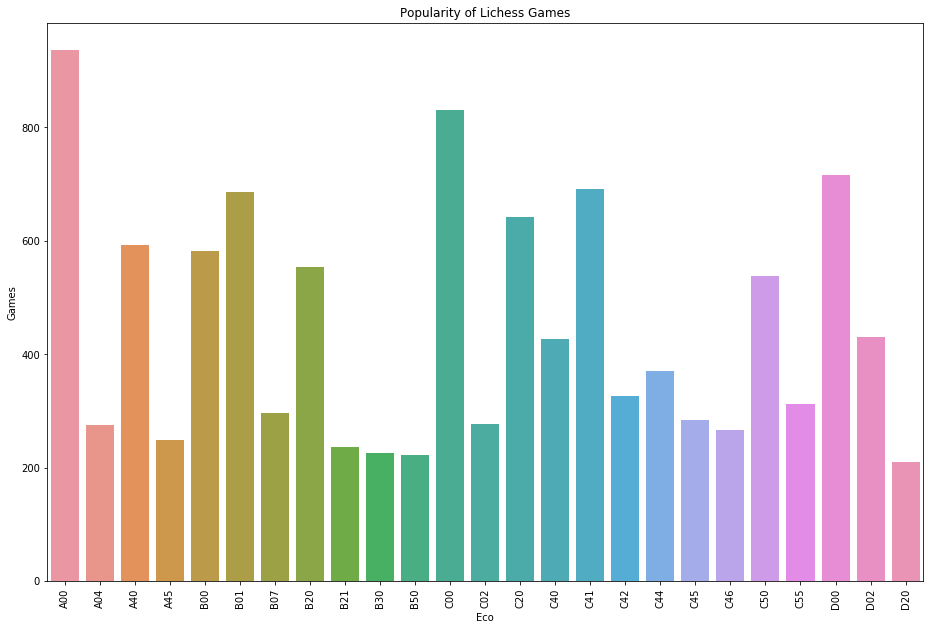

In [123]:
#copy pasting the plot from above
a4_dims = (15.7, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(data = df_most_popular, x = 'Eco', y = 'Games', ax = ax,).set_xticklabels(rotation=90, labels = df_most_popular['Eco'])
plt.title('Popularity of Lichess Games')
plt.show()